# **Trading trends using time series anaylsis:**

**About the project:**
It is Crucial to predict stock price movements for investors and finance companies. In our project we will be using some prediction models to aid in stock prediction using **NASDAQ** Data.


Financial trading is a complex task. The trading decision to buy and sell requires a great deal of knowledge and the capability to make the right decision at the right time.

This research will explore various machine learning algorithms equations including deep learning for this task.


About the Data:

**Market:** NASDAQ

**Companies:** Applied Materials, Inc. (AMAT), Abbott Laboratories (ABT) and more

**Time Span Covered:** 1980-2022 (42 years)

**Data points per Company:** 10,000

**Total Data Points:** 07 Million

**Data Source:** https://www.kaggle.com/datasets/paultimothymooney/stock-market-data



# Installing relevant modules

In [ ]:
!pip install numpy scipy patsy pandas
!pip install pmdarima
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

# Importing Data

In [ ]:
df=pd.read_csv('ABT.csv',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (10778, 7)


,Date,Low,Open,Volume,High,Close,Adjusted Close
0,17-03-1980,0.497999,0.0,7513463,0.512028,0.501506,0.205948
1,18-03-1980,0.494492,0.0,5303621,0.512028,0.505013,0.207389
2,19-03-1980,0.503260,0.0,2523497,0.515535,0.512028,0.210269
3,20-03-1980,0.499753,0.0,4654925,0.513781,0.499753,0.205229
4,21-03-1980,0.499753,0.0,1333034,0.506767,0.505013,0.207389


# Data Processing

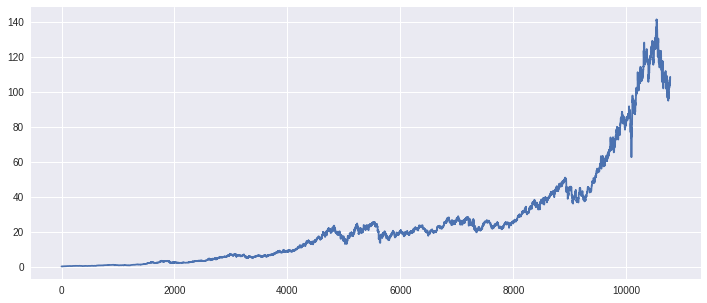

In [ ]:
df['Close'].plot(figsize=(12,5))

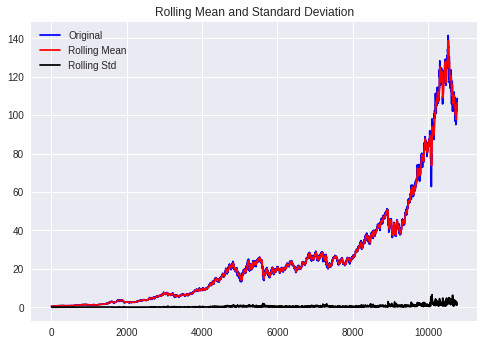

Results of dickey fuller test
Test Statistics                    1.765554
p-value                            0.998278
No. of lags used                  37.000000
Number of observations used    10740.000000
critical value (1%)               -3.430959
critical value (5%)               -2.861809
critical value (10%)              -2.566913
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df['Close'])

In [ ]:
adf_test(df['Close'])

1. ADF :  1.7655537724149737
2. P-Value :  0.9982781949194999
3. Num Of Lags :  37
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 10740
5. Critical Values :
	 1% :  -3.4309590189600474
	 5% :  -2.8618091521950015
	 10% :  -2.5669132645759425


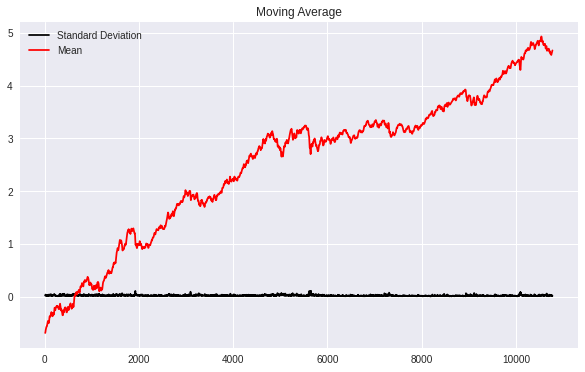

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

# Splitting the Data and Training the Model

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(10778, 7)
(10748, 7) (30, 7)
Date              31-10-2022
Low                98.150002
Open               99.129997
Volume               5885600
High                    99.5
Close              98.940002
Adjusted Close     98.940002
Name: 10748, dtype: object Date              12-12-2022
Low               107.730003
Open              107.730003
Volume               1279071
High              108.809998
Close                 108.68
Adjusted Close        108.68
Name: 10777, dtype: object


# **Arima Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                10748
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -9703.403
Date:                Sun, 25 Dec 2022   AIC                          19422.807
Time:                        18:51:57   BIC                          19481.066
Sample:                             0   HQIC                         19442.457
                              - 10748                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4574    106.898      0.238      0.812    -184.059     234.973
ar.L1          0.9999      0.000   7777.743      0.000       1.000       1.000
ma.L1         -0.0703      0.003    -24.644      0.000      -0.076      -0.065
ma.L2          0.0111      0.003      3.869      0.000       0.005       0.017
ma.L3         -0.0503      0.003    -16.678      0.000      -0.056      -0.044
ma.L4         -0.0049      0.003     -1.598      0.110      -0.011       0.001
ma.L5         -0.0015      0.003     -0.525      0.599      -0.007       0.004
sigma2         0.3559      0.001    315.791      0.000       0.354       0.358
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            639440.85
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             228.31   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Making Predictions

In [ ]:
test

,Date,Low,Open,Volume,High,Close,Adjusted Close
10748,31-10-2022,98.150002,99.129997,5885600,99.500000,98.940002,98.940002
10749,01-11-2022,98.639999,99.620003,5249400,100.320000,99.309998,99.309998
10750,02-11-2022,98.019997,98.730003,5196700,101.230003,98.040001,98.040001
10751,03-11-2022,95.349998,96.809998,4873400,97.010002,96.449997,96.449997
10752,04-11-2022,96.150002,97.830002,4902800,98.230003,98.070000,98.070000
10753,07-11-2022,98.129997,98.779999,4903700,100.040001,99.500000,99.500000
10754,08-11-2022,98.949997,99.900002,5708200,100.260002,99.639999,99.639999
10755,09-11-2022,99.250000,99.910004,5339600,101.269997,99.459999,99.459999
10756,10-11-2022,102.139999,103.029999,5907400,104.440002,104.230003,104.230003
10757,11-11-2022,103.930000,104.639999,7106900,105.910004,104.089996,104.089996


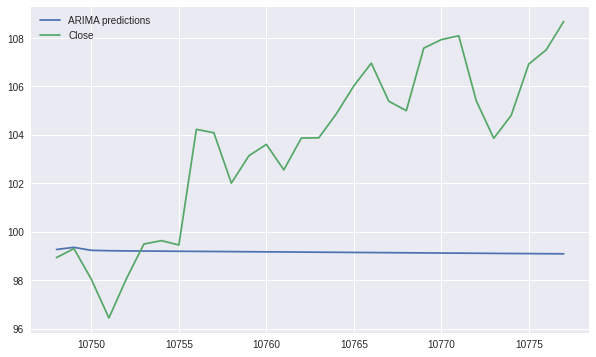

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Close'].plot(legend=True)

# Evaluating the model

In [ ]:
test['Close'].mean()

103.52766647338868

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)


5.540648238479269
